# K Means Color Quantization

### Imports


In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [3]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [4]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

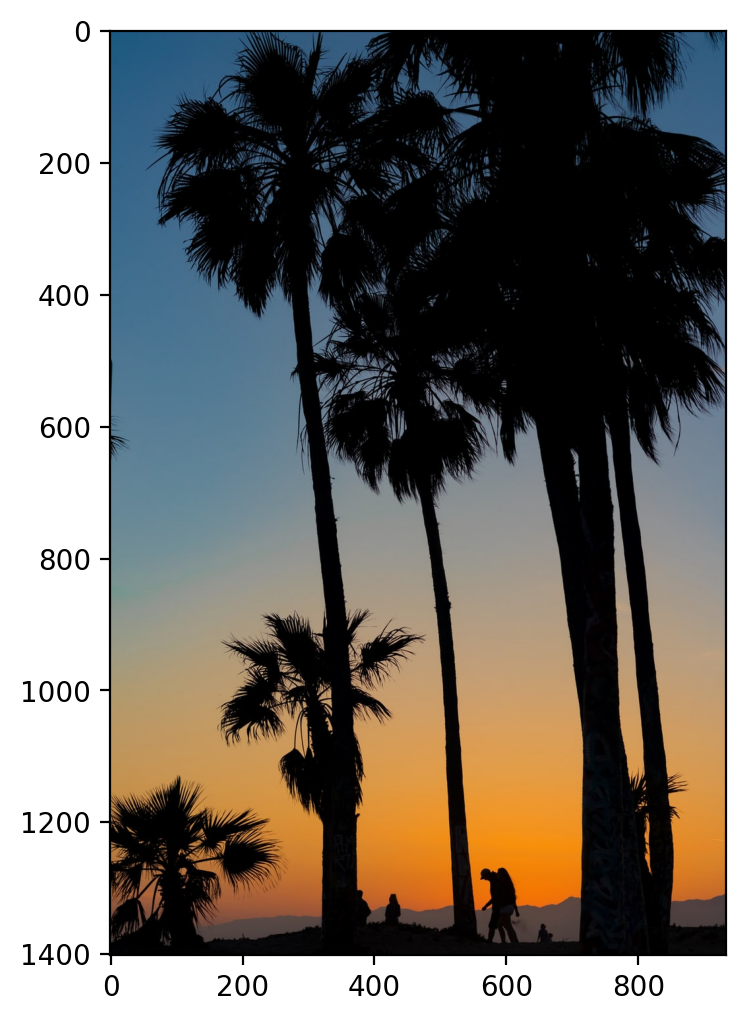

In [5]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [6]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [7]:
(h,w,c) = image_as_array.shape

In [8]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [9]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=6)

In [11]:
model

KMeans(n_clusters=6)

In [12]:
labels = model.fit_predict(image_as_array2d)

c:\Users\miste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [14]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[  2.77621257,   2.57810121,   3.68974118],
       [136.87272434, 143.76867036, 143.87382117],
       [219.15533032, 135.40773756,  46.80901357],
       [ 71.2950106 , 109.26153731, 137.55056315],
       [191.63872767, 154.47651913, 109.32102932],
       [ 67.5604259 ,  61.76273071,  61.95483263]])

In [15]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [16]:
rgb_codes

array([[  3,   3,   4],
       [137, 144, 144],
       [219, 135,  47],
       [ 71, 109, 138],
       [192, 154, 109],
       [ 68,  62,  62]])

In [17]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [18]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 68,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 68,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

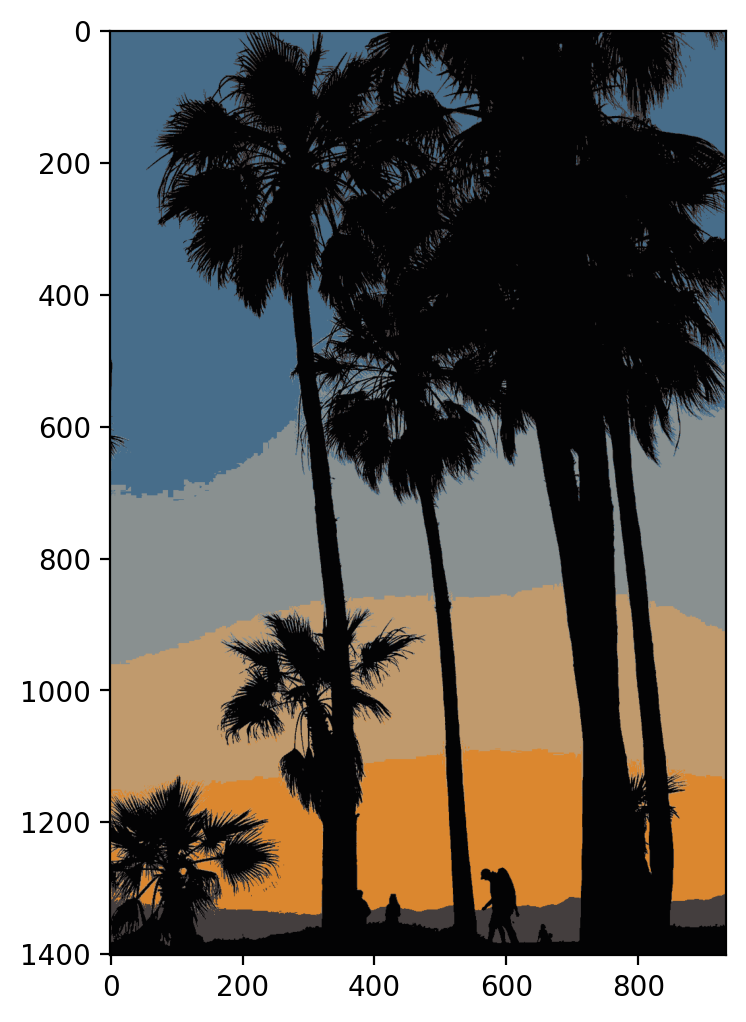

In [19]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)